## Three Moving Average Crossover Stock Trading Strategy

In [18]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
#Import and show data
TSLA_MAC = pd.read_excel('Dataset.xlsx', sheet_name='TSLA')
TSLA_MAC = TSLA_MAC.set_index(pd.DatetimeIndex(TSLA_MAC['Date'].values))
TSLA_MAC.head(10)

,Date,Open,High,Low,Close,Adj,Volume
2020-06-01,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500
2020-06-02,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
2020-06-08,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
2020-06-09,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000
2020-06-10,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000
2020-06-11,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500
2020-06-12,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000


<function matplotlib.pyplot.show(*args, **kw)>

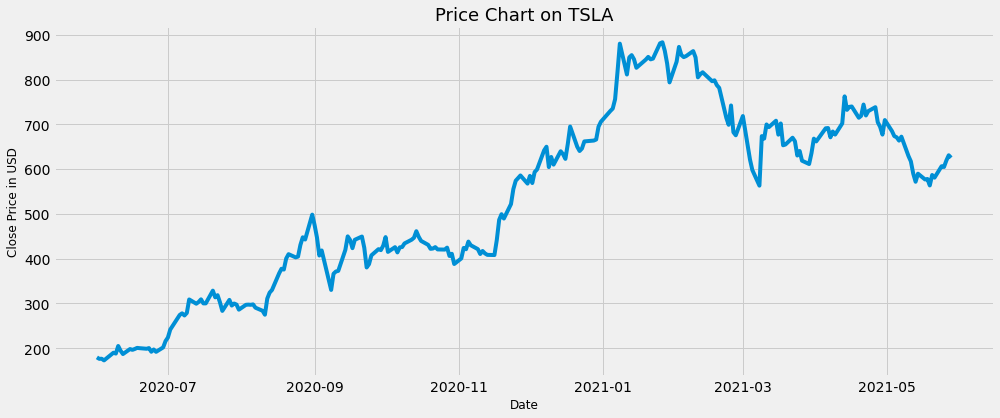

In [20]:
#Visualisation of the close values
plt.figure(figsize=(15,6))
plt.title('Price Chart on TSLA',fontsize= 18)
plt.plot(TSLA_MAC['Close'])
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Close Price in USD', fontsize = 12)
plt.show

In [21]:
#Calculation of the three moving averages

#Short/fast exponential moving average
ShortEMA_TSLA_MAC = TSLA_MAC.Close.ewm(span=5, adjust = False).mean()
#Middle/medium exponential moving average
MiddleEMA_TSLA_MAC = TSLA_MAC.Close.ewm(span=21, adjust = False).mean()
#Long/slow exponential moving average
LongEMA_TSLA_MAC = TSLA_MAC.Close.ewm(span=63, adjust = False).mean()

<function matplotlib.pyplot.show(*args, **kw)>

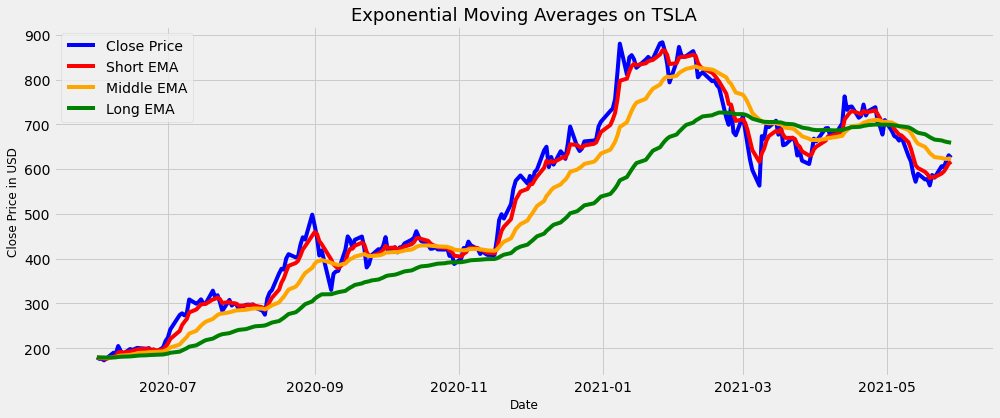

In [22]:
#Visualization of the closing price and the exponential moving averages
plt.figure(figsize=(15,6))
plt.title('Exponential Moving Averages on TSLA',fontsize= 18)
plt.plot(TSLA_MAC['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA_TSLA_MAC, label = 'Short EMA', color = 'red')
plt.plot(MiddleEMA_TSLA_MAC, label = 'Middle EMA', color = 'orange')
plt.plot(LongEMA_TSLA_MAC, label = 'Long EMA', color = 'green')
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Close Price in USD', fontsize = 12)
plt.legend(loc='upper left')
plt.show

In [23]:
#Add the exponential moving averages to the dataset
TSLA_MAC['Short'] = ShortEMA_TSLA_MAC
TSLA_MAC['Middle'] = MiddleEMA_TSLA_MAC
TSLA_MAC['Long'] = LongEMA_TSLA_MAC
TSLA_MAC.head(10)

,Date,Open,High,Low,Close,Adj,Volume,Short,Middle,Long
2020-06-01,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500,179.619995,179.619995,179.619995
2020-06-02,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000,178.517329,179.319268,179.516620
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500,177.875551,179.071334,179.425225
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500,176.209036,178.508122,179.220562
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500,176.516692,178.383021,179.155295
2020-06-08,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500,181.005793,179.437655,179.493692
2020-06-09,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000,183.381863,180.228232,179.763702
2020-06-10,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000,190.591240,182.481119,180.552648
2020-06-11,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500,191.916824,183.579926,180.990628
2020-06-12,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000,190.296550,183.895933,181.180171


In [24]:
#Create a function to signal buy and sell stock orders

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0, len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False\
        and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False\
        and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    
    return(buy_list,sell_list)
        

In [25]:
#Add the buy and sell signals to the dataset
TSLA_MAC['Buy'] = buy_sell_function(TSLA_MAC)[0]
TSLA_MAC['Sell'] = buy_sell_function(TSLA_MAC)[1]

<function matplotlib.pyplot.show(*args, **kw)>

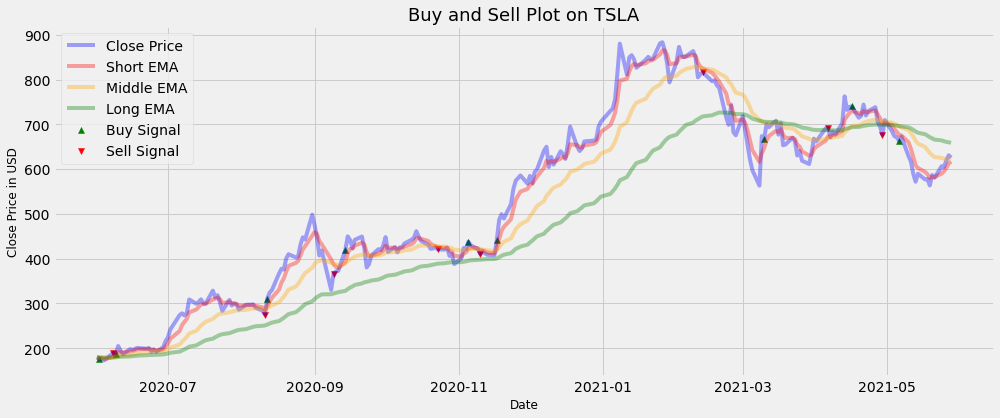

In [26]:
#Visualization of the buy and sell stock order signals
plt.figure(figsize=(15,6))
plt.title('Buy and Sell Plot on TSLA',fontsize= 18)
plt.plot(TSLA_MAC['Close'], label = 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA_TSLA_MAC, label = 'Short EMA', color = 'red', alpha = 0.35)
plt.plot(MiddleEMA_TSLA_MAC, label = 'Middle EMA', color = 'orange', alpha = 0.35)
plt.plot(LongEMA_TSLA_MAC, label = 'Long EMA', color = 'green', alpha = 0.35)
plt.scatter(TSLA_MAC.index, TSLA_MAC['Buy'],label = 'Buy Signal', color = 'green', marker = '^', alpha = 1)
plt.scatter(TSLA_MAC.index, TSLA_MAC['Sell'],label = 'Sell Signal', color = 'red', marker = 'v', alpha = 1)
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Close Price in USD', fontsize = 12)
plt.legend(loc='upper left')
plt.show

## On-Balance Volume (OBV) Stock Trading Strategy

In [27]:
#Import and show data
TSLA_OBV = pd.read_excel('Dataset.xlsx', sheet_name='TSLA')
TSLA_OBV = TSLA_OBV.set_index(pd.DatetimeIndex(TSLA_OBV['Date'].values))
TSLA_OBV.head(10)

,Date,Open,High,Low,Close,Adj,Volume
2020-06-01,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500
2020-06-02,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
2020-06-08,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
2020-06-09,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000
2020-06-10,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000
2020-06-11,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500
2020-06-12,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000


<function matplotlib.pyplot.show(*args, **kw)>

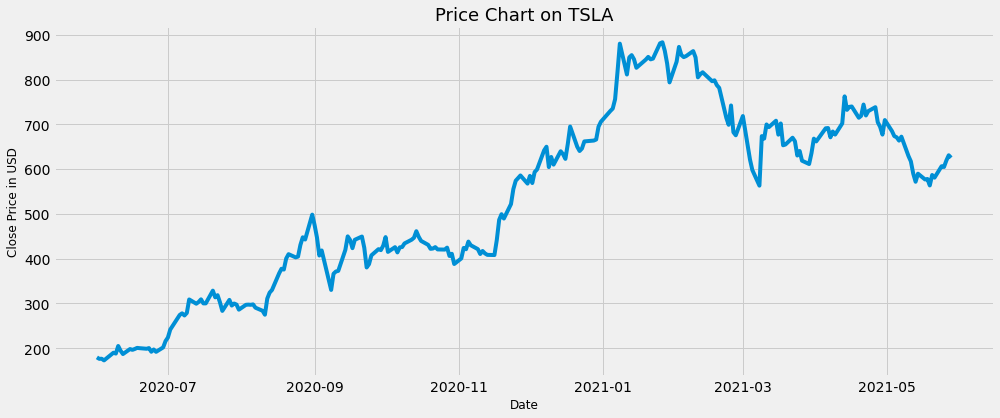

In [28]:
# Visualisation of the close values
plt.figure(figsize=(15,6))
plt.title('Price Chart on TSLA',fontsize= 18)
plt.plot(TSLA_OBV['Close'])
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Close Price in USD', fontsize = 12)
plt.show

In [29]:
#On-Balance Volume (OBV) computation

OBV = []
OBV.append(0)

for i in range(1, len(TSLA_OBV.Close)):
    if TSLA_OBV.Close[i] > TSLA_OBV.Close[i-1]:
        OBV.append(OBV[-1] + TSLA_OBV.Volume[i])
    elif TSLA_OBV.Close[i] < TSLA_OBV.Close[i-1]:
        OBV.append(OBV[-1] - TSLA_OBV.Volume[i])
    else:
        OBV.append(OBV[-1])

In [30]:
# Store and show the OBV and the OBV Exponential Moving Average (EMA) into new colums
TSLA_OBV['OBV'] = OBV
TSLA_OBV['OBV_EMA'] = TSLA_OBV['OBV'].ewm(span=20).mean()
TSLA_OBV.head(10)

,Date,Open,High,Low,Close,Adj,Volume,OBV,OBV_EMA
2020-06-01,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500,0,0.000000e+00
2020-06-02,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000,-67828000,-3.560970e+07
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500,-28080500,-3.284502e+07
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500,-72519000,-4.429829e+07
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500,-33459500,-4.167648e+07
2020-06-08,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500,37414000,-2.499200e+07
2020-06-09,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000,-19527000,-2.395870e+07
2020-06-10,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000,73290000,-7.148776e+06
2020-06-11,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500,-6292500,-7.011425e+06
2020-06-12,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000,-90109500,-1.952527e+07


<function matplotlib.pyplot.show(*args, **kw)>

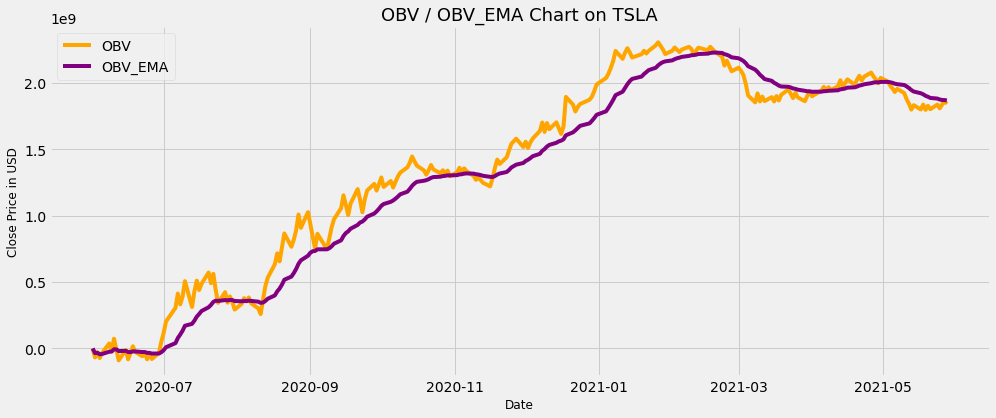

In [31]:
# Visualization of the OBV and Exponential Moving Average OBV
plt.figure(figsize=(15,6))
plt.title('OBV / OBV_EMA Chart on TSLA',fontsize= 18)
plt.plot(TSLA_OBV['OBV'], label = 'OBV', color = 'orange')
plt.plot(TSLA_OBV['OBV_EMA'], label = 'OBV_EMA', color = 'purple')
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Close Price in USD', fontsize = 12)
plt.legend(loc='upper left')
plt.show

In [32]:
# Creation of a Function that signals when to give a buy or sell stock order
# If OBV > OBV_EMA then buy
# If OBV < OBV_EMA the sell
# Else - hold

def buy_sell(signal, col1, col2):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range (0, len(signal)):
        if signal[col1][i] > signal[col2][i] and flag != 1:
            sigPriceBuy.append(signal['Close'][i])
            sigPriceSell.append(np.nan)
            flag = 1
        elif signal[col1][i] < signal[col2][i] and flag != 0:
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
            flag = 0
        else:
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(np.nan)
            
    return (sigPriceBuy, sigPriceSell)

In [33]:
# Create buy and sell columns
x = buy_sell(TSLA_OBV, 'OBV', 'OBV_EMA')
TSLA_OBV['Buy_Signal_Price'] = x[0]
TSLA_OBV['Sell_Signal_Price'] = x[1]
TSLA_OBV.head()

,Date,Open,High,Low,Close,Adj,Volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
2020-06-01,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500,0,0.000000e+00,NaN,NaN
2020-06-02,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000,-67828000,-3.560970e+07,NaN,176.311996
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500,-28080500,-3.284502e+07,176.591995,NaN
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500,-72519000,-4.429829e+07,NaN,172.876007
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500,-33459500,-4.167648e+07,177.132004,NaN


<function matplotlib.pyplot.show(*args, **kw)>

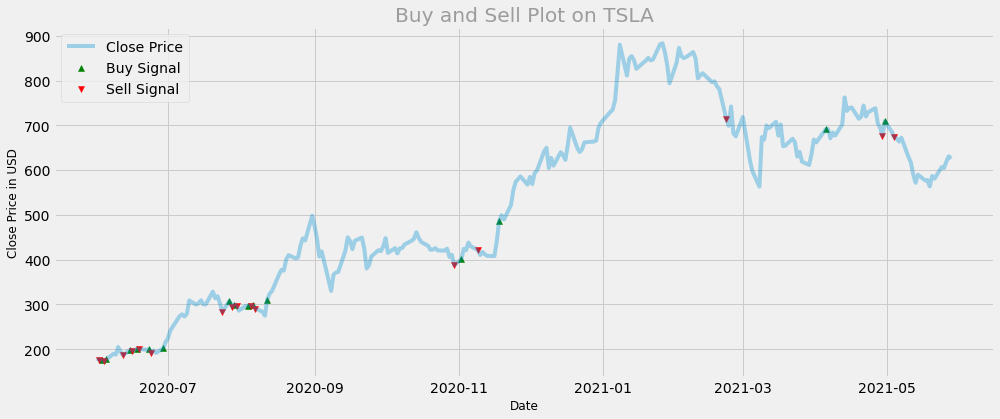

In [34]:
#Visualization of the buy and sell stock order signals
plt.figure(figsize=(15,6))
plt.plot(TSLA_OBV['Close'], label = 'Close Price', alpha = 0.35)
plt.title('Buy and Sell Plot on TSLA',alpha = 0.35)
plt.scatter(TSLA_OBV.index, TSLA_OBV['Buy_Signal_Price'], label = 'Buy Signal', marker = '^', alpha = 1, color = 'green')
plt.scatter(TSLA_OBV.index, TSLA_OBV['Sell_Signal_Price'], label = 'Sell Signal', marker = 'v', alpha = 1 , color = 'red')
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Close Price in USD', fontsize = 12)
plt.legend(loc='upper left')
plt.show